# Support Vector Machines

In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Import regular expressions to process emails
import re

# Plotting library
from matplotlib import pyplot

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

# library written for this exercise providing additional functions for assignment submission, and others
import utils


# tells matplotlib to embed plots within the notebook
%matplotlib inline

## 1 Support Vector Machines

### 1.1 Example dataset 1

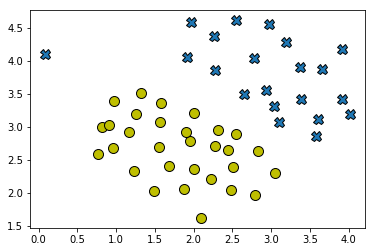

In [2]:
data = loadmat(os.path.join('data', 'ex6data1.mat'))
X, y = data['X'], data['y'][:, 0]

utils.plotData(X, y)

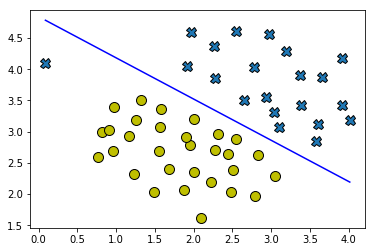

In [3]:
# You should try to change the C value below and see how the decision
# boundary varies (e.g., try C = 1000)
C = 1

model = utils.svmTrain(X, y, C, utils.linearKernel, 1e-3, 20)
utils.visualizeBoundaryLinear(X, y, model)

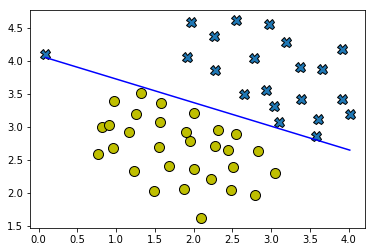

In [4]:
# You should try to change the C value below and see how the decision
# boundary varies (e.g., try C = 1000)
C = 1000

model = utils.svmTrain(X, y, C, utils.linearKernel, 1e-3, 20)
utils.visualizeBoundaryLinear(X, y, model)

### 1.2 SVM with Gaussian Kernels

In [5]:
def gaussianKernel(x1, x2, sigma):
    sim = 0
    norm = (x1 - x2).T.dot(x1 - x2)
    sim = np.exp(-norm/(2*sigma**2))
    return sim

In [6]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

sim = gaussianKernel(x1, x2, sigma)

print('Gaussian Kernel between x1 = [1, 2, 1], x2 = [0, 4, -1], sigma = %0.2f:'
      '\n\t%f\n(for sigma = 2, this value should be about 0.324652)\n' % (sigma, sim))


Gaussian Kernel between x1 = [1, 2, 1], x2 = [0, 4, -1], sigma = 2.00:
	0.324652
(for sigma = 2, this value should be about 0.324652)



### 1.3 Example Dataset 2

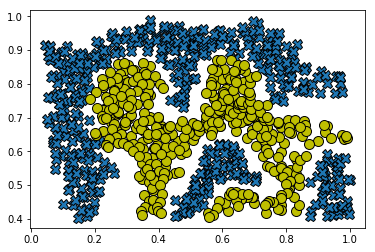

In [7]:
# Load from ex6data2
# You will have X, y as keys in the dict data
data = loadmat(os.path.join('data', 'ex6data2.mat'))
X, y = data['X'], data['y'][:, 0]

# Plot training data
utils.plotData(X, y)


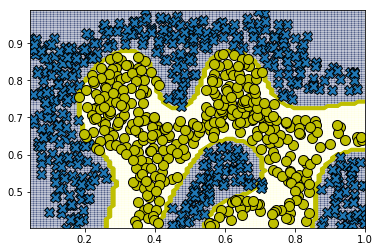

In [8]:
C = 1
sigma = 0.1

model = utils.svmTrain(X, y, C, gaussianKernel, args=(sigma,))
utils.visualizeBoundary(X, y, model)

### 1.4 Example Dataset 3

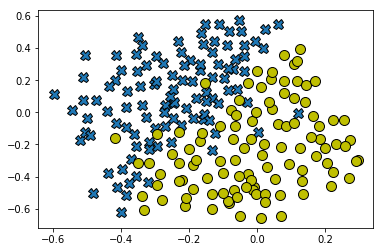

In [9]:
# Load from ex6data3
# You will have X, y, Xval, yval as keys in the dict data
data = loadmat(os.path.join('data', 'ex6data3.mat'))
X, y, Xval, yval = data['X'], data['y'][:, 0], data['Xval'], data['yval'][:, 0]

# Plot training data
utils.plotData(X, y)


In [10]:
def dataset3Params(X, y, Xval, yval):
    errors = np.zeros((8, 8))
    test = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    res_C = 1
    res_sigma = 0.3
    olderr = 1
    for i in range(8):
        for j in range(8):
            C = test[i]
            sigma = test[j]
            model = utils.svmTrain(X, y, C, gaussianKernel, args=(sigma,))
            predictions = utils.svmPredict(model, Xval)
            errors = np.mean(predictions != yval)
            if errors < olderr:
                res_C = C
                res_sigma = sigma
                olderr = errors
                
    return res_C, res_sigma

In [11]:
# Try different SVM Parameters here
C, sigma = dataset3Params(X, y, Xval, yval)

In [12]:
(C, sigma)

(1, 0.1)

1 0.1


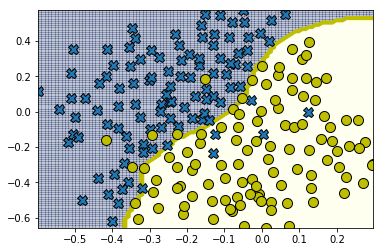

In [13]:
# Train the SVM
# model = utils.svmTrain(X, y, C, lambda x1, x2: gaussianKernel(x1, x2, sigma))
model = utils.svmTrain(X, y, C, gaussianKernel, args=(sigma,))
utils.visualizeBoundary(X, y, model)
print(C, sigma)

## 2 Spam Classification

In [14]:
def precessEmail(email_contents, verbose=True):
    vocabList = utils.getVocabList()
    word_indices = []
    
    email_contents = email_contents.lower()
    
    email_contents = re.compile('<[^<>]+>').sub(' ', email_contents)
    
    email_contents = re.compile('[0-9]+').sub(' number ', email_contents)
    
    email_contents = re.compile('(http|https)://[^\s]*').sub(' httpaddr ', email_contents)
    
    email_contents = re.compile('[^\s]+@[^\s]+').sub(' emailaddr ', email_contents)
    
    email_contents = re.compile('[$]+').sub(' dollar ', email_contents)
    
    email_contents = re.split('[ @$/#.-:&*+=\[\]?!(){},''">_<;%\n\r]', email_contents)

    email_contents = [word for word in email_contents if len(word) > 0]
    
    stemmer = utils.PorterStemmer()
    processed_email = []
    
    for word in email_contents:
        word = re.compile('[^a-zA-Z0-9]').sub('', word).strip()
        word = stemmer.stem(word)
        processed_email.append(word)
        
        if len(word) < 1:
            continue
            
        for i in range(len(vocabList)):
            if word == vocabList[i]:
                word_indices.append(i)
                break
                
    if verbose:
        print('----------------')
        print('Processed email:')
        print('----------------')
        print(' '.join(processed_email))
    return word_indices
    